In [27]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## Описание задачи
Инсульт является 2-й ведущей причиной смерти во всем мире по данным (ВОЗ), на которую приходится примерно 11% от общего числа смертей.
Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курения. Используя этот набор данных, научить модель прогнозировать инсульт.

## Загрузка данных

In [28]:
file = "healthcare-dataset-stroke-data.csv"
data_raw = pd.read_csv(file)

In [29]:
data_raw.shape

(5110, 12)

## Визуализируем данные

###### Выводим первые 5 строк таблицы

In [30]:
data_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###### Выводим 5 последних строк таблицы

In [31]:
data_raw.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Среднее

In [32]:
data_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### По таблице можно увидеть, что в данных нет людей старше 82. Средний возраст людей в данной таблице 43. Данные несбалансированы, у большинства людей не было инсульта. Сердечные заболевания наблюдаются менее чем у 6% людей.

In [33]:
data_raw.mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

### Корреляционная матрица

In [34]:
corr_mat = data_raw.corr()
corr_mat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


#### Чем светлее ячейка - тем больше по абсолютной величине коэффициент корреляции:

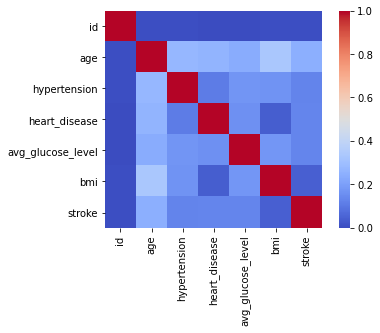

In [35]:
#plt.figure(figsize=(15,10))
#corr_mat = data_raw.corr()
#sns.heatmap(corr, annot = True)

sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

#### bmi (индекс массы тела) зависит больше от параметра age (возраст), чем от других

### Разброс

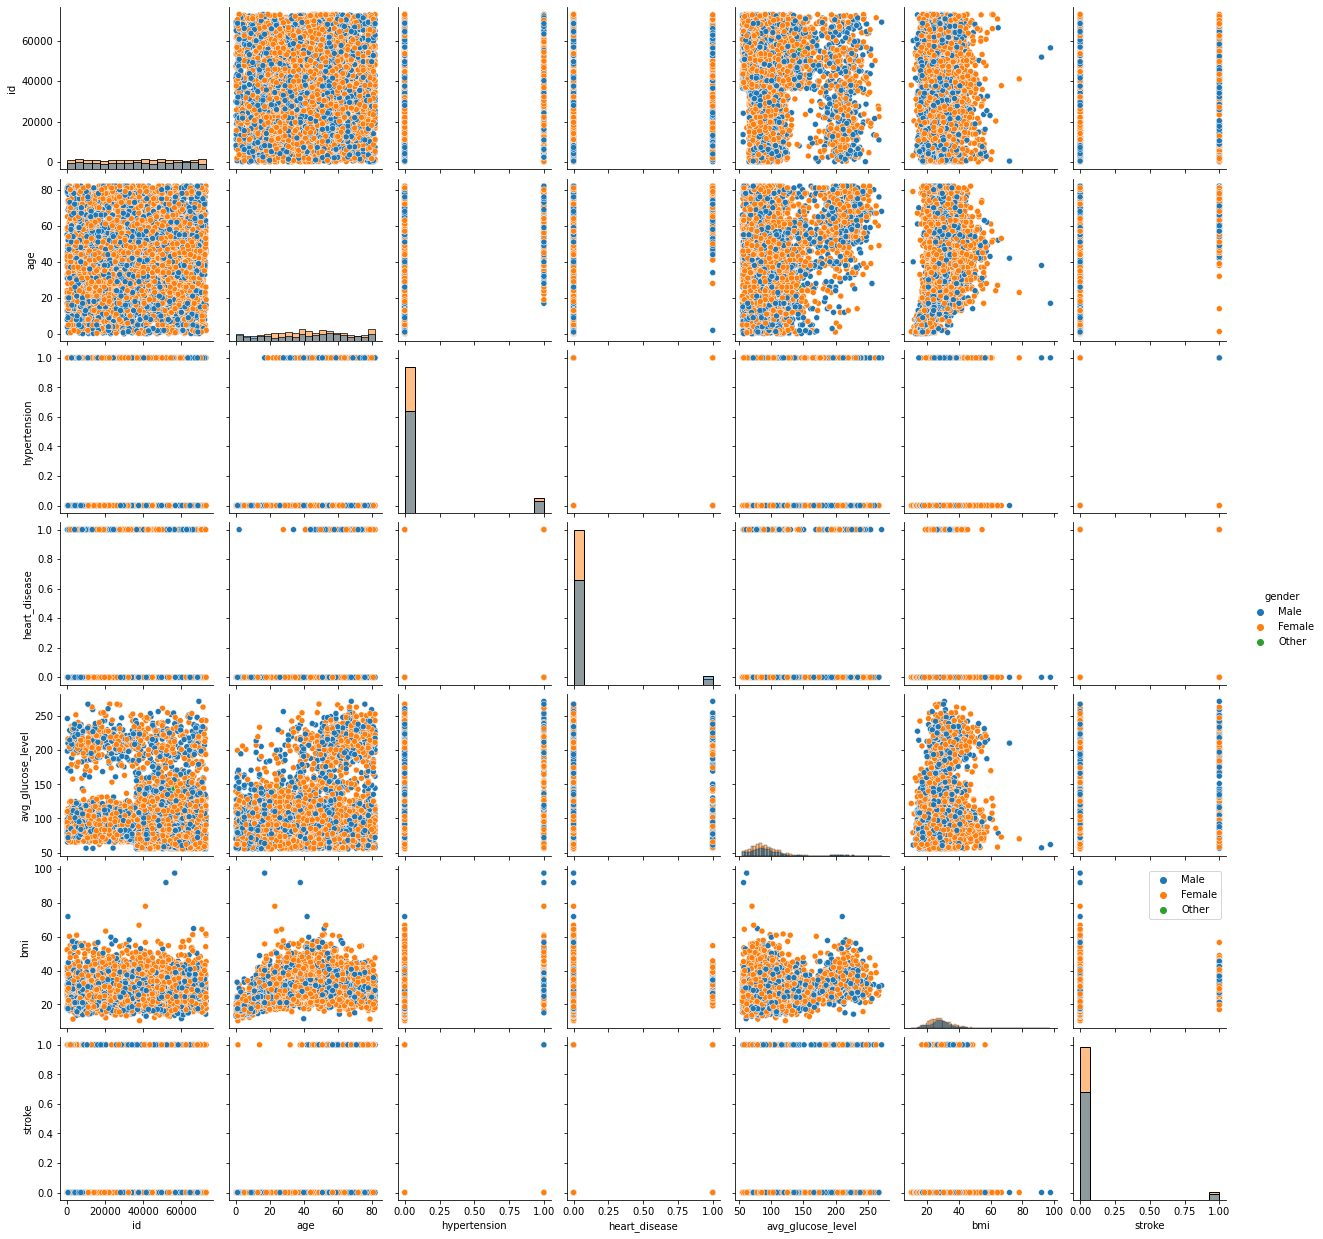

In [36]:
sns.pairplot(data_raw, hue='gender', diag_kind='hist')
plt.legend()
pass

##### Скопируем данные

In [37]:
data = data_raw

## Обработка пропущенных значений

#### Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [38]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [39]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [40]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
data_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Обработка номинальных признаков

#### Обработаем бинарный признак (заменяем на числовой):

In [42]:
data['ever_married'] = pd.factorize(data['ever_married'])[0]

In [43]:
data_dummies = pd.get_dummies(data['gender'])

In [44]:
data_dummies.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


#### Присоединяем к таблице

In [45]:
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['gender'], axis=1)

In [46]:
data.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,0,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0
1,51676,61.0,0,0,0,Self-employed,Rural,202.21,28.1,never smoked,1,1,0,0
2,31112,80.0,0,1,0,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,0,Private,Urban,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,0,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,0


#### Обрабатываем небинарные признаки:

In [47]:
data_dummies = pd.get_dummies(data['work_type'])
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['work_type'], axis=1)

data_dummies = pd.get_dummies(data['Residence_type'])
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['Residence_type'], axis=1)

data_dummies = pd.get_dummies(data['smoking_status'])
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['smoking_status'], axis=1)

data.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,0,228.69,36.6,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,0,202.21,28.1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,0,105.92,32.5,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,0,171.23,34.4,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,0,174.12,24.0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


## Нормализация

#### Выполним стандартизацию всех признаков:

In [48]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [49]:
data_stand.describe()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,...,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-1.278277e-16,-7.276211e-16,3.834984e-15,3.465047e-16,2.588493e-16,3.674925e-15,-9.830601e-15,-8.842731e-15,2.038161e-16,4.016357e-16,...,-2.471658e-16,2.277369e-16,2.775558e-16,-2.316912e-15,4.180826e-16,-4.297932e-16,-1.521027e-15,5.802382e-16,9.937691e-17,-5.552201e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.722489e+00,-1.908074e+00,-3.285697e-01,-2.389234e-01,-7.238134e-01,-1.126848e+00,-2.410791e+00,-2.263051e-01,-1.189394e+00,-8.402611e-01,...,-6.574993e-02,-1.156897e+00,-4.368378e-01,-3.940737e-01,-9.839834e-01,-1.016078e+00,-6.579463e-01,-4.576314e-01,-7.666993e-01,-4.272714e-01
25%,-8.872898e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-7.238134e-01,-6.382598e-01,-6.574445e-01,-2.263051e-01,-1.189394e+00,-8.402611e-01,...,-6.574993e-02,-1.156897e+00,-4.368378e-01,-3.940737e-01,-9.839834e-01,-1.016078e+00,-6.579463e-01,-4.576314e-01,-7.666993e-01,-4.272714e-01
50%,1.957169e-02,7.842450e-02,-3.285697e-01,-2.389234e-01,-7.238134e-01,-3.149637e-01,-9.897124e-02,-2.263051e-01,8.406001e-01,-8.402611e-01,...,-6.574993e-02,8.642120e-01,-4.368378e-01,-3.940737e-01,-9.839834e-01,9.839834e-01,-6.579463e-01,-4.576314e-01,-7.666993e-01,-4.272714e-01
75%,8.583503e-01,7.859932e-01,-3.285697e-01,-2.389234e-01,1.381301e+00,1.753909e-01,5.114531e-01,-2.263051e-01,8.406001e-01,1.189873e+00,...,-6.574993e-02,8.642120e-01,-4.368378e-01,-3.940737e-01,1.016078e+00,9.839834e-01,1.519583e+00,-4.576314e-01,1.304037e+00,-4.272714e-01
max,1.721135e+00,1.714677e+00,3.042899e+00,4.184622e+00,1.381301e+00,3.656787e+00,8.927516e+00,4.417948e+00,8.406001e-01,1.189873e+00,...,1.520617e+01,8.642120e-01,2.288731e+00,2.537100e+00,1.016078e+00,9.839834e-01,1.519583e+00,2.184737e+00,1.304037e+00,2.339975e+00


## Разбиение данных

#### Для классификации уберем id

In [51]:
data_stand.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'Female', 'Male', 'Other',
       'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children',
       'Rural', 'Urban', 'Unknown', 'formerly smoked', 'never smoked',
       'smokes'],
      dtype='object')

In [52]:
X = data_stand.drop(['stroke', 'id'], axis=1)
y = data['stroke']

#### Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3832, 1278)

### kNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [167]:
knn

KNeighborsClassifier(n_neighbors=7)

In [168]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.04305845511482255

In [169]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [170]:
err_test

0.06025039123630673

#### При 7 соседях для kNN ошибка для тестовой выборки получается наименьшей

### Из-за несбалансированности датасета (5% людей с инсультом) модель могла научиться лучше предсказывать здоровых людей